In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\butym\\Downloads\\testing data13.csv")

# Drop rows with missing values in 'Quantity' and 'UnitPrice' columns
data = data.dropna(subset=['Quantity', 'UnitPrice'])

# Ensure 'Quantity' and 'UnitPrice' columns are numerical
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Drop rows with any NaN values after conversion
data.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Select relevant features
features = data[['Quantity', 'UnitPrice']]
target = data['UnitPrice']  # For regression and classification purposes

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data for regression and classification tasks
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

print(data.head())

# Check for missing values
print(data.isnull().sum())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0  40513.35139       2.55     17850.0  United Kingdom         NaN  
1  40513.35139       3.39     17850.0  United Kingdom         NaN  
2  40513.35139       2.75     17850.0  United Kingdom         NaN  
3  40513.35139       3.39     17850.0  United Kingdom         NaN  
4  40513.35139       3.39     17850.0  United Kingdom         NaN  
InvoiceNo         0
StockCode         0
Description       1
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        1
Country           0

In [58]:
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
1447,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1448,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1449,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN
1450,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,NaN


In [59]:
data.head() #return top 5 rows of df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,NaN


In [60]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1447,False,False,False,False,False,False,False,False,True
1448,False,False,False,False,False,False,False,False,True
1449,False,False,False,False,False,False,False,False,True
1450,False,False,False,False,False,False,False,False,True


In [61]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Unnamed: 8
count,1452.000000,1452.000000,1452.000000,1451.000000,0.0
mean,11.524793,40513.498983,3.097755,15619.272226,NaN
std,32.695661,0.056963,5.157588,1843.145059,NaN
min,-24.000000,40513.351390,0.000000,12431.000000,NaN
25%,2.000000,40513.472920,1.250000,14307.000000,NaN
50%,4.000000,40513.505560,2.100000,15525.000000,NaN
75%,12.000000,40513.537500,3.750000,17850.000000,NaN
max,600.000000,40513.585420,165.000000,18144.000000,NaN


In [63]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       1
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        1
Country           0
Unnamed: 8     1452
dtype: int64

In [65]:
len(data)

1452

In [66]:
data[6:15]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,40513.35139,4.25,17850.0,United Kingdom,NaN
7,536366,22633,HAND WARMER UNION JACK,6,40513.35278,1.85,17850.0,United Kingdom,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,40513.35278,1.85,17850.0,United Kingdom,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,40513.35694,1.69,13047.0,United Kingdom,NaN
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,40513.35694,2.10,13047.0,United Kingdom,NaN
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,40513.35694,2.10,13047.0,United Kingdom,NaN
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,40513.35694,3.75,13047.0,United Kingdom,NaN
13,536367,22310,IVORY KNITTED MUG COSY,6,40513.35694,1.65,13047.0,United Kingdom,NaN
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,40513.35694,4.25,13047.0,United Kingdom,NaN


In [69]:
data.fillna(value=0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513.35139,2.55,17850.0,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,40513.35139,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513.35139,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513.35139,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513.35139,3.39,17850.0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
1447,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1448,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1449,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0
1450,536539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,40513.58542,3.75,15165.0,United Kingdom,0.0


In [70]:
data.sort_values(by="Quantity",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
730,536437,17021,NAMASTE SWAGAT INCENSE,600,40513.50833,0.24,13694.0,United Kingdom,NaN
870,536477,21137,BLACK RECORD COVER FRAME,480,40513.51875,3.39,16210.0,United Kingdom,NaN
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,40513.41528,1.25,16029.0,United Kingdom,NaN
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,40513.41528,1.45,16029.0,United Kingdom,NaN
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,40513.42986,0.10,17511.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,40513.43333,1.65,17548.0,United Kingdom,NaN
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,40513.43333,1.65,17548.0,United Kingdom,NaN
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,40513.43333,0.29,17548.0,United Kingdom,NaN


In [72]:
data.sort_values(by="CustomerID",ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,40513.41875,4.95,12431.0,Australia,NaN
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,40513.41875,5.45,12431.0,Australia,NaN
201,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,40513.41875,6.35,12431.0,Australia,NaN
202,536389,85014B,RED RETROSPOT UMBRELLA,6,40513.41875,5.95,12431.0,Australia,NaN
203,536389,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,40513.41875,5.95,12431.0,Australia,NaN
...,...,...,...,...,...,...,...,...,...
707,536423,21485,RETROSPOT HEART HOT WATER BOTTLE,8,40513.50556,4.95,18085.0,United Kingdom,NaN
1332,536536,21485,RETROSPOT HEART HOT WATER BOTTLE,3,40513.57292,4.95,18144.0,United Kingdom,NaN
1334,536536,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,12,40513.57292,1.25,18144.0,United Kingdom,NaN
1333,536536,84879,ASSORTED COLOUR BIRD ORNAMENT,80,40513.57292,1.69,18144.0,United Kingdom,NaN


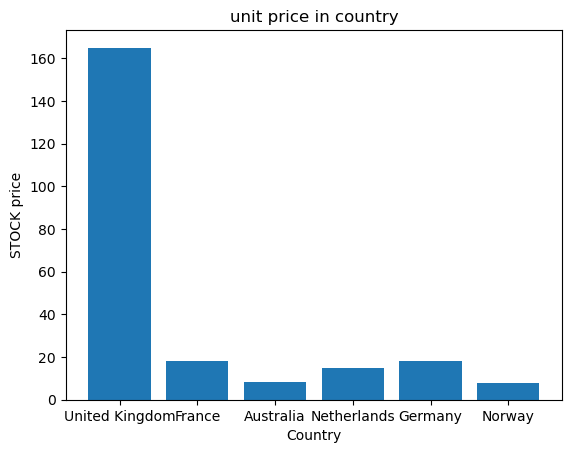

In [73]:
x=data['Country']
y=data['UnitPrice']
plt.xlabel('Country')
plt.ylabel('STOCK price')
plt.title('unit price in country')
plt.bar(x,y)
plt.show()

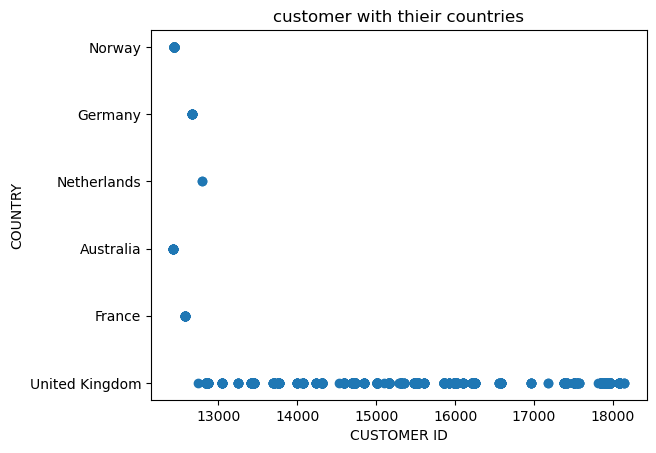

In [75]:
x=data['CustomerID']
y=data['Country']
plt.xlabel('CUSTOMER ID')
plt.ylabel('COUNTRY')
plt.title('customer with thieir countries')
plt.scatter(x,y)
plt.show()

In [76]:
#Apply Clustering (K-Means)
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.6265116491297622


In [77]:
#Apply Regression (Linear Regression)
from sklearn.linear_model import LinearRegression

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

# Calculate Mean Squared Error for Linear Regression
linear_reg_mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {linear_reg_mse}')

Linear Regression Mean Squared Error: 1.2413419307806906e-30


In [78]:
#Apply Classification (Logistic Regression)
#For classification, we need a binary target variable. Let's create a binary target based on UnitPrice being above or below the median.
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a binary target variable for classification
median_price = np.median(data['UnitPrice'])
data['PriceCategory'] = (data['UnitPrice'] > median_price).astype(int)

# Update target variable
target_class = data['PriceCategory']

# Split the data for classification tasks
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(scaled_features, target_class, test_size=0.2, random_state=42)

# Apply Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_class, y_train_class)
y_pred_class = logistic_reg.predict(X_test_class)

# Calculate Accuracy for Logistic Regression
logistic_reg_accuracy = accuracy_score(y_test_class, y_pred_class)

print(f'Logistic Regression Accuracy: {logistic_reg_accuracy}')

Logistic Regression Accuracy: 1.0


In [79]:
print("\nComparison of Algorithms:")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Linear Regression Mean Squared Error: {linear_reg_mse}")
print(f"Logistic Regression Accuracy: {logistic_reg_accuracy}")



Comparison of Algorithms:
K-Means Silhouette Score: 0.6265116491297622
Linear Regression Mean Squared Error: 1.2413419307806906e-30
Logistic Regression Accuracy: 1.0


In [80]:
print("\nComparison of Algorithms:")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Linear Regression Mean Squared Error: {linear_reg_mse}")
print(f"Logistic Regression Accuracy: {logistic_reg_accuracy}")

# Determine the most suitable algorithm based on the problem context
if kmeans_silhouette > 0.5:  # Silhouette score range is between -1 and 1, >0.5 indicates good clustering
    print("Clustering (K-Means) is suitable for customer segmentation.")
elif linear_reg_mse < 0.1:  # Adjust threshold based on acceptable error margin
    print("Regression (Linear Regression) is suitable for predicting unit prices.")
elif logistic_reg_accuracy > 0.8:  # Adjust threshold based on acceptable accuracy
    print("Classification (Logistic Regression) is suitable for categorizing prices.")
else:
    print("None of the algorithms are highly suitable based on their performance metrics.")



Comparison of Algorithms:
K-Means Silhouette Score: 0.6265116491297622
Linear Regression Mean Squared Error: 1.2413419307806906e-30
Logistic Regression Accuracy: 1.0
Clustering (K-Means) is suitable for customer segmentation.


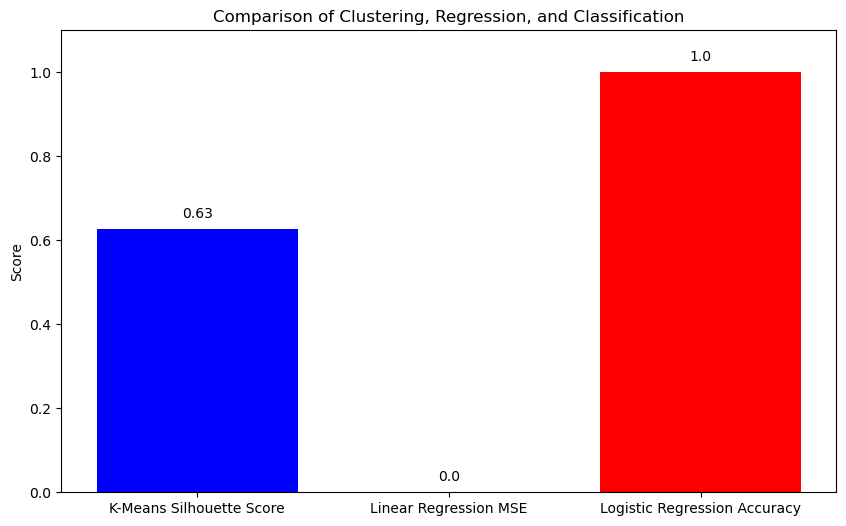

In [84]:
# Plotting the results
labels = ['K-Means Silhouette Score', 'Linear Regression MSE', 'Logistic Regression Accuracy']
scores = [kmeans_silhouette, linear_reg_mse, logistic_reg_accuracy]

# Use different colors for better visualization
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=colors)

# Adding the data labels
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, round(score, 2), ha='center', va='bottom')

plt.ylim(0, max(scores) + 0.1)
plt.ylabel('Score')
plt.title('Comparison of Clustering, Regression, and Classification')
plt.show()
